# 벡터와 행렬 기초 - 머신러닝을 위한 선형대수

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [33]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 1. 벡터 (Vector) 기초

### 벡터란 무엇인가?

벡터는 크기(magnitude)와 방향(direction)을 가진 수학적 객체이다.  
머신러닝에서는 데이터의 특성(feature)을 표현하는 핵심 도구이다.

예시:
- 2차원 벡터: [3, 4] → x축으로 3, y축으로 4
- 3차원 벡터: [1, 2, 3] → x, y, z축 각각으로 1, 2, 3
- n차원 벡터: 머신러닝에서 하나의 샘플을 표현

c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48289 (\N{HANGUL SYLLABLE BEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54616 (\N{HANGUL S

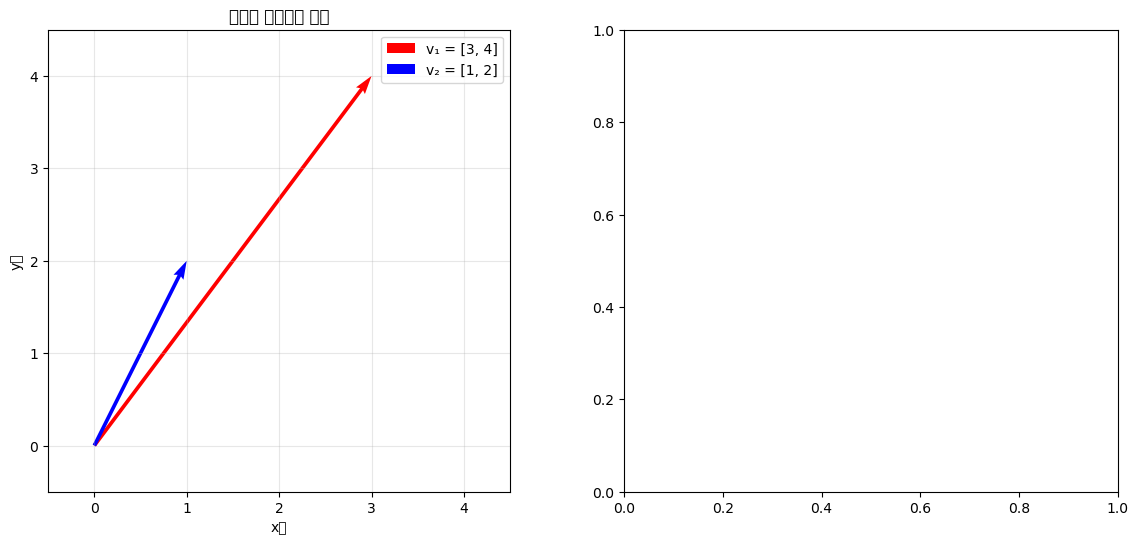

In [35]:
# 벡터의 기하학적 의미 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2D 벡터 시각화
v1 = np.array([3, 4])
v2 = np.array([1, 2])

ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.008, label='v₁ = [3, 4]')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.008, label='v₂ = [1, 2]')

ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 4.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('벡터의 기하학적 표현')
ax1.set_xlabel('x축')
ax1.set_ylabel('y축')
ax1.legend()

## 1.1 벡터 생성과 기본 연산

In [3]:
print("\n1.1 벡터 생성과 기본 연산")
print("-" * 30)

# 벡터 생성
v1 = np.array([2, 3])
v2 = np.array([1, 4])
v3 = np.array([3, -1, 2])

print(f"2차원 벡터 v1: {v1}")
print(f"2차원 벡터 v2: {v2}")
print(f"3차원 벡터 v3: {v3}")

# 벡터 덧셈
vector_sum = v1 + v2
print(f"\n벡터 덧셈 v1 + v2: {vector_sum}")

# 벡터 뺄셈
vector_diff = v1 - v2
print(f"벡터 뺄셈 v1 - v2: {vector_diff}")

# 스칼라 곱셈
scalar_mult = 3 * v1
print(f"스칼라 곱셈 3 * v1: {scalar_mult}")


1.1 벡터 생성과 기본 연산
------------------------------
2차원 벡터 v1: [2 3]
2차원 벡터 v2: [1 4]
3차원 벡터 v3: [ 3 -1  2]

벡터 덧셈 v1 + v2: [3 7]
벡터 뺄셈 v1 - v2: [ 1 -1]
스칼라 곱셈 3 * v1: [6 9]


## 1.2 벡터의 크기(노름)

In [5]:
# 1.2 벡터의 크기(노름)
print("\n1.2 벡터의 크기 (L2 노름)")
print("-" * 30)

def vector_magnitude(v):
    """벡터의 크기(L2 노름) 계산"""
    return np.sqrt(np.sum(v**2))

# 직접 구현
mag_v1_manual = vector_magnitude(v1)
print(f"v1의 크기 (직접 계산): {mag_v1_manual:.3f}")

# NumPy 사용
mag_v1_numpy = np.linalg.norm(v1)


1.2 벡터의 크기 (L2 노름)
------------------------------
v1의 크기 (직접 계산): 3.606


## 1.3 벡터 정규화 (단위벡터 만들기)

In [7]:
print("\n1.3 벡터 정규화")
print("-" * 30)

def normalize_vector(v):
    """벡터를 정규화하여 단위벡터로 만들기"""
    return v / np.linalg.norm(v)

v1_normalized = normalize_vector(v1)
print(f"v1 정규화: {v1_normalized}")
print(f"정규화된 v1의 크기: {np.linalg.norm(v1_normalized):.3f}")


1.3 벡터 정규화
------------------------------
v1 정규화: [0.5547002  0.83205029]
정규화된 v1의 크기: 1.000


## 1.4 내적 (Dot Product)

In [8]:
print("\n1.4 내적 (Dot Product)")
print("-" * 30)
print("""
내적은 두 벡터의 유사도를 측정하는 중요한 연산입니다.
- 내적 = |a| * |b| * cos(θ)
- θ는 두 벡터 사이의 각도
""")

# 내적 계산
dot_product = np.dot(v1, v2)
print(f"v1 · v2 = {dot_product}")

# 각도 계산
cos_angle = dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))
angle_rad = np.arccos(cos_angle)
angle_deg = np.degrees(angle_rad)
print(f"v1과 v2 사이의 각도: {angle_deg:.2f}°")


1.4 내적 (Dot Product)
------------------------------

내적은 두 벡터의 유사도를 측정하는 중요한 연산입니다.
- 내적 = |a| * |b| * cos(θ)
- θ는 두 벡터 사이의 각도

v1 · v2 = 14
v1과 v2 사이의 각도: 19.65°


## 1.5 벡터 시각화


1.5 벡터 시각화
------------------------------


C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 48289 (\N{HANGUL SYLLABLE BEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shina\AppData\Local\Temp\ipykernel_23476\4066576972.py:30: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing fro

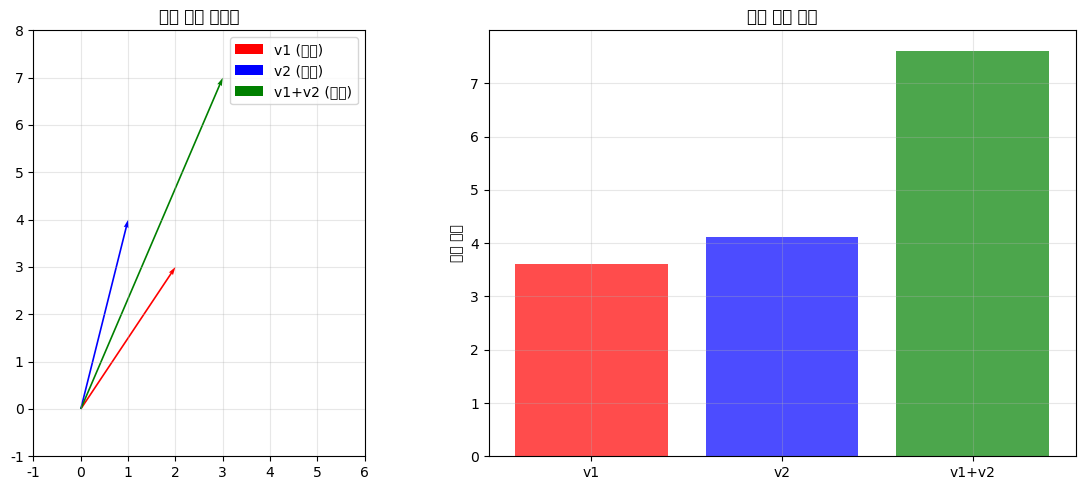

In [30]:
print("\n1.5 벡터 시각화")
print("-" * 30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2D 벡터 시각화
ax1 = axes[0]
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)
ax1.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.005)

ax1.set_xlim(-1, 6)
ax1.set_ylim(-1, 8)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('벡터 연산 시각화')
ax1.legend(['v1 (빨강)', 'v2 (파랑)', 'v1+v2 (초록)'])

# 벡터 크기 비교
vectors = [v1, v2, vector_sum]
magnitudes = [np.linalg.norm(v) for v in vectors]
labels = ['v1', 'v2', 'v1+v2']

ax2 = axes[1]
ax2.bar(labels, magnitudes, color=['red', 'blue', 'green'], alpha=0.7)
ax2.set_ylabel('벡터 크기')
ax2.set_title('벡터 크기 비교')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. 행렬 (Matrix) 기초

행렬은 수들을 직사각형 형태로 배열한 것입니다.  
머신러닝에서는 데이터셋, 가중치, 변환 등을 표현하는 핵심 도구입니다.  

예시:
- 2×3 행렬: 2개의 행과 3개의 열
- 데이터셋: 각 행은 샘플, 각 열은 특성
- 가중치 행렬: 신경망의 층 간 연결

## 2.1 행렬 생성과 기본 정보

In [10]:
print("\n2.1 행렬 생성과 기본 정보")
print("-" * 30)

# 행렬 생성
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

C = np.array([[2, 1],
              [3, 4]])

print(f"행렬 A (2×3):\n{A}")
print(f"행렬 B (3×2):\n{B}")
print(f"행렬 C (2×2):\n{C}")

print(f"\nA의 형태: {A.shape}")
print(f"B의 형태: {B.shape}")
print(f"C의 형태: {C.shape}")


2.1 행렬 생성과 기본 정보
------------------------------
행렬 A (2×3):
[[1 2 3]
 [4 5 6]]
행렬 B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]
행렬 C (2×2):
[[2 1]
 [3 4]]

A의 형태: (2, 3)
B의 형태: (3, 2)
C의 형태: (2, 2)


## 2.2 행렬 기본 연산

In [11]:
print("\n2.2 행렬 기본 연산")
print("-" * 30)

# 행렬 덧셈 (같은 크기 행렬만 가능)
D = np.array([[1, 1],
              [2, 2]])

matrix_sum = C + D
print(f"행렬 덧셈 C + D:\n{matrix_sum}")

# 행렬 스칼라 곱셈
scalar_mult_matrix = 2 * C
print(f"스칼라 곱셈 2 * C:\n{scalar_mult_matrix}")

# 원소별 곱셈 (Hadamard product)
element_wise = C * D
print(f"원소별 곱셈 C ⊙ D:\n{element_wise}")


2.2 행렬 기본 연산
------------------------------
행렬 덧셈 C + D:
[[3 2]
 [5 6]]
스칼라 곱셈 2 * C:
[[4 2]
 [6 8]]
원소별 곱셈 C ⊙ D:
[[2 1]
 [6 8]]


## 2.3 행렬 곱셈

In [12]:
print("\n2.3 행렬 곱셈")
print("-" * 30)
print("""
행렬 곱셈은 머신러닝의 핵심 연산입니다!
- A(m×n) × B(n×p) = C(m×p)
- 첫 번째 행렬의 열 수 = 두 번째 행렬의 행 수
""")

# 행렬 곱셈 예제
matrix_mult = np.dot(A, B)  # 또는 A @ B
print(f"A × B (2×3 × 3×2 = 2×2):\n{matrix_mult}")

# 수동 계산으로 확인
print("\n수동 계산으로 확인:")
print(f"(0,0) 원소: {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} + {A[0,2]}×{B[2,0]} = {A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]}")


2.3 행렬 곱셈
------------------------------

행렬 곱셈은 머신러닝의 핵심 연산입니다!
- A(m×n) × B(n×p) = C(m×p)
- 첫 번째 행렬의 열 수 = 두 번째 행렬의 행 수

A × B (2×3 × 3×2 = 2×2):
[[ 58  64]
 [139 154]]

수동 계산으로 확인:
(0,0) 원소: 1×7 + 2×9 + 3×11 = 58


## 2.4 행렬의 전치 (Transpose)

In [13]:
print("\n2.4 행렬의 전치")
print("-" * 30)

A_T = A.T  # 또는 np.transpose(A)
print(f"A의 전치 A^T:\n{A_T}")
print(f"A의 형태: {A.shape} → A^T의 형태: {A_T.shape}")


2.4 행렬의 전치
------------------------------
A의 전치 A^T:
[[1 4]
 [2 5]
 [3 6]]
A의 형태: (2, 3) → A^T의 형태: (3, 2)


## 2.5 특수한 행렬들

In [14]:
print("\n2.5 특수한 행렬들")
print("-" * 30)

# 영행렬
zeros_matrix = np.zeros((3, 3))
print(f"영행렬 (3×3):\n{zeros_matrix}")

# 단위행렬
identity_matrix = np.eye(3)
print(f"단위행렬 (3×3):\n{identity_matrix}")

# 대각행렬
diagonal_matrix = np.diag([1, 2, 3])
print(f"대각행렬:\n{diagonal_matrix}")


2.5 특수한 행렬들
------------------------------
영행렬 (3×3):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
단위행렬 (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
대각행렬:
[[1 0 0]
 [0 2 0]
 [0 0 3]]


## 2.6 행렬식 (Determinant)

In [15]:
print("\n2.6 행렬식")
print("-" * 30)
print("""
행렬식은 정사각행렬의 중요한 성질입니다.
- det(A) ≠ 0 이면 역행렬이 존재
- det(A) = 0 이면 특이행렬 (singular matrix)
""")

det_C = np.linalg.det(C)
print(f"행렬 C의 행렬식: {det_C:.3f}")

# 2×2 행렬의 행렬식 수동 계산
det_manual = C[0,0] * C[1,1] - C[0,1] * C[1,0]
print(f"수동 계산: {C[0,0]} × {C[1,1]} - {C[0,1]} × {C[1,0]} = {det_manual}")


2.6 행렬식
------------------------------

행렬식은 정사각행렬의 중요한 성질입니다.
- det(A) ≠ 0 이면 역행렬이 존재
- det(A) = 0 이면 특이행렬 (singular matrix)

행렬 C의 행렬식: 5.000
수동 계산: 2 × 4 - 1 × 3 = 5


## 2.7 역행렬 (Inverse)

In [ ]:
print("\n2.7 역행렬")
print("-" * 30)

if det_C != 0:
    C_inv = np.linalg.inv(C)
    print(f"행렬 C의 역행렬:\n{C_inv}")
    
    # 검증: C × C^(-1) = I
    verification = np.dot(C, C_inv)
    print(f"검증 C × C^(-1):\n{verification}")
    print("(거의 단위행렬이어야 함)")


2.7 역행렬
------------------------------
행렬 C의 역행렬:
[[ 0.8 -0.2]
 [-0.6  0.4]]
검증 C × C^(-1):
[[ 1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00]]
(거의 단위행렬이어야 함)


# 3. 머신러닝 연결고리

## 3.1 데이터 행렬 표현

In [19]:
print("\n3.1 데이터 행렬 표현")
print("-" * 30)

# 가상의 데이터셋 생성
np.random.seed(42)
n_samples = 100
n_features = 3

# 데이터 생성 (키, 몸무게, 나이)
heights = np.random.normal(170, 10, n_samples)
weights = np.random.normal(70, 15, n_samples)
ages = np.random.normal(30, 8, n_samples)

# 데이터 행렬 구성
X = np.column_stack([heights, weights, ages])
print(f"데이터 행렬 X의 형태: {X.shape}")
print(f"첫 5개 샘플:\n{X[:5]}")


3.1 데이터 행렬 표현
------------------------------
데이터 행렬 X의 형태: (100, 3)
첫 5개 샘플:
[[174.96714153  48.76943887  32.86229888]
 [168.61735699  63.69032016  34.48627621]
 [176.47688538  64.85928225  38.66440995]
 [185.23029856  57.96584096  38.43041642]
 [167.65846625  67.58071433  18.97864506]]


## 3.2 선형 변환 예제

In [20]:
print("\n3.2 선형 변환 예제")
print("-" * 30)

# 2D 데이터 포인트들
points = np.array([[1, 2], [3, 1], [2, 3], [4, 2]]).T
print(f"원본 포인트들:\n{points}")

# 회전 행렬 (45도 회전)
theta = np.pi / 4  # 45도
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])

# 회전 적용
rotated_points = np.dot(rotation_matrix, points)
print(f"회전된 포인트들:\n{rotated_points}")


3.2 선형 변환 예제
------------------------------
원본 포인트들:
[[1 3 2 4]
 [2 1 3 2]]
회전된 포인트들:
[[-0.70710678  1.41421356 -0.70710678  1.41421356]
 [ 2.12132034  2.82842712  3.53553391  4.24264069]]


## 3.3 시각화

c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\shina\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

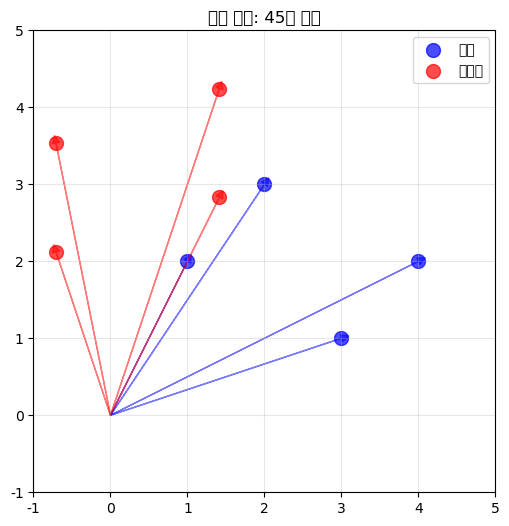

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 원본 포인트
ax.scatter(points[0], points[1], c='blue', s=100, alpha=0.7, label='원본')

# 회전된 포인트
ax.scatter(rotated_points[0], rotated_points[1], c='red', s=100, alpha=0.7, label='회전됨')

# 원점에서 각 포인트로의 벡터
for i in range(points.shape[1]):
    ax.arrow(0, 0, points[0,i], points[1,i], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', alpha=0.5)
    ax.arrow(0, 0, rotated_points[0,i], rotated_points[1,i], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', alpha=0.5)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('선형 변환: 45도 회전')
plt.show()

### 4. 실습 문제

**1. 벡터 a = [3, 4, 5]와 b = [1, 2, 3]의 내적을 계산하고, 두 벡터 사이의 각도를 구하세요.**

In [25]:
# 문제 1 해답
print("\n문제 1 해답:")
print("-" * 20)
a = np.array([3, 4, 5])
b = np.array([1, 2, 3])

dot_ab = np.dot(a, b)
angle_ab = np.arccos(dot_ab / (np.linalg.norm(a) * np.linalg.norm(b)))
angle_ab_deg = np.degrees(angle_ab)

print(f"a · b = {dot_ab}")
print(f"두 벡터 사이의 각도: {angle_ab_deg:.2f}°")


문제 1 해답:
--------------------
a · b = 26
두 벡터 사이의 각도: 10.67°


**2. 다음 행렬의 곱셈을 계산하세요:**  

   A = [[1, 2], [3, 4]]  
   B = [[2, 0], [1, 3]]

In [26]:
# 문제 2 해답
print("\n문제 2 해답:")
print("-" * 20)
A_prob = np.array([[1, 2], [3, 4]])
B_prob = np.array([[2, 0], [1, 3]])
result = np.dot(A_prob, B_prob)
print(f"A × B =\n{result}")


문제 2 해답:
--------------------
A × B =
[[ 4  6]
 [10 12]]


**3. 행렬 [[2, 1], [4, 3]]의 역행렬을 구하고, 원래 행렬과 곱해서 단위행렬이 나오는지 확인하세요.**

In [27]:
# 문제 3 해답
print("\n문제 3 해답:")
print("-" * 20)
matrix_prob = np.array([[2, 1], [4, 3]])
matrix_inv = np.linalg.inv(matrix_prob)
verification_prob = np.dot(matrix_prob, matrix_inv)
print(f"원래 행렬:\n{matrix_prob}")
print(f"역행렬:\n{matrix_inv}")
print(f"검증 (원래 × 역행렬):\n{verification_prob}")

print("\n" + "="*50)
print("벡터와 행렬 기초 학습 완료!")
print("다음 단계: 고유값과 고유벡터 학습")
print("="*50)



문제 3 해답:
--------------------
원래 행렬:
[[2 1]
 [4 3]]
역행렬:
[[ 1.5 -0.5]
 [-2.   1. ]]
검증 (원래 × 역행렬):
[[1. 0.]
 [0. 1.]]

벡터와 행렬 기초 학습 완료!
다음 단계: 고유값과 고유벡터 학습
